In [446]:
import torch
import numpy as np
from models import *
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [447]:
states_dim = 500
actions_dim = 1#states_dim
max_torque = 2.0
small_model = True
device = 'cpu'
file_location = '/scratch/gobi1/abachiro/paml_results'

In [448]:
# gym.envs.register(id='lin-dyn-v0', entry_point='gym_linear_dynamics.envs:LinDynEnv',)
# env = gym.make('lin-dyn-v0')
env = gym.make('Pendulum-v0')

In [539]:
actor = DeterministicPolicy(states_dim, actions_dim, max_torque).double()

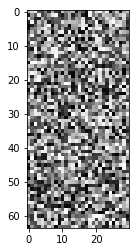

In [472]:
weights=actor.lin1.weight.detach().numpy()
maxVal = weights.max()
minVal = np.abs(weights.min())
maxVal = np.maximum(maxVal,minVal)
weights = weights / maxVal
weights = weights / 2.
weights = weights + 0.5
plt.imshow(weights, cmap="gray")
plt.show()

In [562]:
# actor.load_state_dict(torch.load(os.path.join(file_location,'act_policy_model_free_state30_salient2_checkpoint_lin-dyn-v0_horizon1_traj201_action0.1_constrainedModel_1.pth'), map_location=device))

actor.load_state_dict(torch.load(os.path.join(file_location,'act_policy_pML_state30_salient2_checkpoint_lin-dyn-v0_horizon8_traj201_noiseless_planning_constrainedModel_1.pth'), map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/gobi1/abachiro/paml_results/act_policy_pML_state30_salient2_checkpoint_lin-dyn-v0_horizon8_traj201_noiseless_planning_constrainedModel_1.pth'

In [563]:
env.seed(1)
state = env.reset()
states = [state]
actions = []
rewards = []
noise = OUNoise(env.action_space)
for timestep in range(200):
    action = actor.sample_action(torch.DoubleTensor(state)).detach().numpy()
#     action = noise.get_action(action, timestep)
#     action[:2] = [0.0, 0.0]
#     action = np.zeros(states_dim)
    state_prime, reward, done, _ = env.step(action)

    actions.append(action)
    states.append(state_prime)
    rewards.append(reward)
    
    state = state_prime

In [564]:
np_states = np.stack(states)

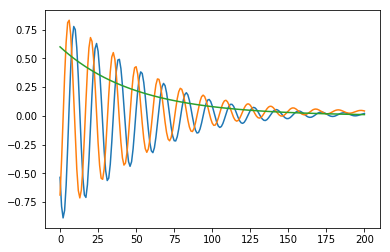

In [565]:
plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
plt.show()

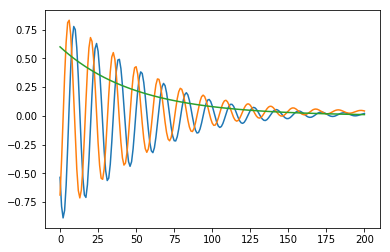

In [566]:
plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
plt.show()

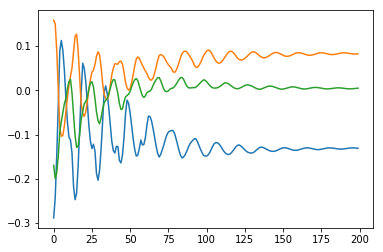

In [567]:
np_actions = np.stack(actions)
plt.plot(np_actions[:,0])
plt.plot(np_actions[:,1])
plt.plot(np_actions[:,2])
plt.show()

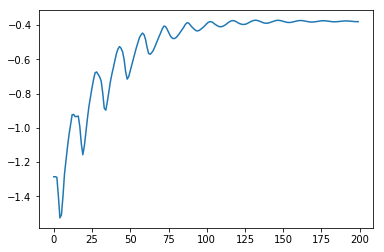

In [568]:
np_actions = np.stack(rewards)
plt.plot(np_actions[:])

plt.show()

In [569]:
states[200][2:]

array([ 0.01053974, -0.00415864,  0.01059845,  0.0034152 ,  0.01196805,
        0.00484591,  0.00915854, -0.01548831,  0.01708785, -0.01546258,
        0.01463175, -0.00227588, -0.00868484,  0.01443618, -0.00930522,
       -0.00055648, -0.01105207, -0.0083204 , -0.00393332,  0.01661213,
       -0.00818253, -0.00921566,  0.0058545 ,  0.00649794, -0.00954873,
       -0.00199215,  0.002926  ,  0.01396164])

In [570]:
np.dot(actions[0].T,actions[0])

0.5243639417861816

In [559]:
np.dot(states[1][:2].T,states[1][:2].T)

1.3258936090184432

In [560]:
actor

DeterministicPolicy(
  (lin1): Linear(in_features=30, out_features=64, bias=True)
  (relu): ReLU()
  (theta): Linear(in_features=64, out_features=64, bias=True)
  (action_head): Linear(in_features=64, out_features=30, bias=True)
)

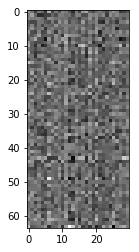

In [561]:
weights=actor.lin1.weight.detach().numpy()
maxVal = weights.max()
minVal = np.abs(weights.min())
maxVal = np.maximum(maxVal,minVal)
weights = weights / maxVal
weights = weights / 2.
weights = weights + 0.5
plt.imshow(weights, cmap="gray")
plt.show()

In [522]:
x = torch.from_numpy(np.zeros(states_dim))
pi1 = []
for x1 in np.arange(-5, 5, 0.25):
    x[0] = x1
    for x2 in np.arange(-5, 5, 0.25):
        x[1] = x2
        pi1.append(actor(x)[0].detach().numpy())

pi1 = np.stack(pi1).reshape(40,40)

In [523]:
x = torch.from_numpy(np.zeros(states_dim))
pi2 = []
for x1 in np.arange(-5, 5, 0.25):
    x[0] = x1
    for x2 in np.arange(-5, 5, 0.25):
        x[1] = x2
        pi2.append(actor(x)[1].detach().numpy())

pi2 = np.stack(pi2).reshape(40,40)

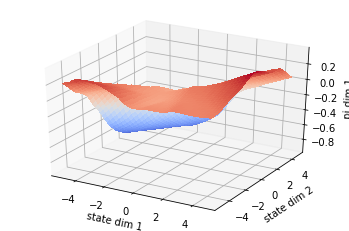

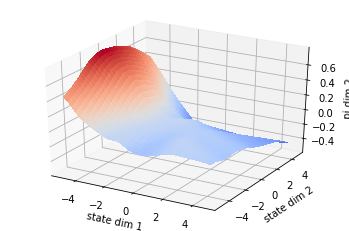

In [524]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = pi1
Z2 = pi2

ax.set_xlabel('state dim 1')
ax.set_ylabel('state dim 2')
ax.set_zlabel('pi dim 1');
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = pi2

ax2.set_xlabel('state dim 1')
ax2.set_ylabel('state dim 2')
ax2.set_zlabel('pi dim 2');
surf2 = ax2.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

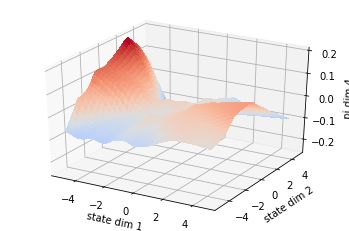

In [525]:
x = torch.from_numpy(np.zeros(states_dim))
pi3 = []
for x1 in np.arange(-5, 5, 0.25):
    x[0] = x1
    for x2 in np.arange(-5, 5, 0.25):
        x[1] = x2
        pi3.append(actor(x)[3].detach().numpy())

pi3 = np.stack(pi3).reshape(40,40)

fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = pi3

ax3.set_xlabel('state dim 1')
ax3.set_ylabel('state dim 2')
ax3.set_zlabel('pi dim 4');
surf3 = ax3.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [161]:
actor.lin1.bias

Parameter containing:
tensor([-0.1606, -0.0704,  0.0180, -0.0100,  0.0230,  0.0240,  0.1217,  0.1393,
         0.0707,  0.0025,  0.1278,  0.0163, -0.0281,  0.0436,  0.0742,  0.0321,
        -0.0052, -0.0071, -0.0228,  0.0663,  0.0115, -0.0366, -0.0839,  0.1841,
         0.0558, -0.0028, -0.0069,  0.0155,  0.0817,  0.1059, -0.1032,  0.0368,
         0.0720,  0.0259,  0.0336,  0.1438,  0.0025,  0.0277,  0.1284, -0.1039,
         0.0166,  0.0573,  0.0132,  0.0172,  0.0790, -0.0012, -0.2086,  0.0704,
        -0.0656,  0.0469,  0.1075,  0.0377, -0.0173,  0.1133,  0.0434,  0.0515,
         0.1089, -0.0082,  0.0662,  0.1058,  0.1133, -0.0164,  0.0446, -0.0403],
       dtype=torch.float64, requires_grad=True)

In [181]:
actor.lin1.weight

Parameter containing:
tensor([[-1.3416e-01,  1.1360e-01, -1.0194e-01, -1.6725e-01, -5.9883e-02,
         -7.7330e-02,  3.7843e-02, -1.9540e-02, -9.1154e-02,  7.9284e-02],
        [ 2.6415e-01,  3.9095e-02,  4.0852e-02, -9.8306e-02,  8.2050e-02,
         -7.6844e-02,  4.7290e-02,  7.5719e-02, -5.0623e-02, -4.8988e-03],
        [-1.0157e-01, -7.3955e-03,  1.7927e-02, -1.1137e-01, -1.0504e-02,
         -1.1551e-01,  6.1088e-03,  1.0198e-01, -2.2923e-01, -1.3890e-01],
        [ 8.7270e-02, -2.4414e-01,  1.2737e-02,  7.3463e-02, -2.5194e-03,
          1.4291e-01,  2.1958e-02,  3.2105e-02,  9.6300e-04, -1.3399e-01],
        [-6.0016e-02, -1.0388e-01,  9.5640e-02, -1.6017e-01,  3.0369e-02,
         -1.2360e-01, -2.4717e-02,  4.0043e-02, -1.1686e-01,  2.4129e-02],
        [-3.1560e-01,  6.0210e-03,  5.7685e-02,  6.0808e-02,  1.5145e-02,
          1.2557e-01,  1.4402e-02,  7.2699e-02,  2.5225e-02,  7.2013e-02],
        [-4.3406e-01, -1.5952e-01,  4.1835e-02, -6.3874e-02,  8.9797e-02,
         -

In [17]:
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='constrained', hidden_size=1)
P_hat.double()

# P_hat.load_state_dict(torch.load(os.path.join(file_location,'model_mle_checkpoint_state2_salient2_actorcritic_lin_dyn_horizon1_traj51_all_losses.pth'), map_location=device))

DirectEnvModel(
  (fc1): Linear(in_features=501, out_features=1, bias=True)
  (_enc_mu): Linear(in_features=1, out_features=500, bias=True)
)

In [29]:
weights1 = P_hat.fc1.weight.data.numpy()
# biases1 = P_hat.fc1.bias.data.numpy()
# weights2 = P_hat._enc_mu.weight.data.numpy()
# biases2 = P_hat._enc_mu.bias.data.numpy()

In [30]:
weights1.shape

(10, 20)

In [7]:
weights2.shape

(10, 20)

In [23]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [553]:
def display_weights(file_name):
    P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))
    weights = P_hat.fc1.weight.data.numpy()
#     weights = P_hat._enc_mu.weight.data.numpy()
#     print(weights)
    print(weights[:2,:2])
    print(weights[:2,10:12])
#     biases = P_hat.fc1.bias.data.numpy()
#     biases = P_hat._enc_mu.bias.data.numpy()
    maxVal = weights.max()
    minVal = np.abs(weights.min())
    maxVal = np.maximum(maxVal,minVal)
    weights = weights / maxVal
    weights = weights / 2.
    weights = weights + 0.5
    plt.imshow(weights, cmap="gray")
    plt.show()

In [554]:
def display_weights2(file_name):
    P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))
#     weights = P_hat.fc1.weight.data.numpy()
    weights = P_hat._enc_mu.weight.data.numpy()
#     print(weights)
    print(weights[:2,:2])
    print(weights[:2,10:12])
#     biases = P_hat.fc1.bias.data.numpy()
#     biases = P_hat._enc_mu.bias.data.numpy()
    maxVal = weights.max()
    minVal = np.abs(weights.min())
    maxVal = np.maximum(maxVal,minVal)
    weights = weights / maxVal
    weights = weights / 2.
    weights = weights + 0.5
    plt.imshow(weights, cmap="gray")
    plt.show()

[[ 0.30770386  0.13599598]
 [-0.13522233  0.30587859]]
[[ 0.0335617  -0.00174411]
 [ 0.00125616  0.03346254]]


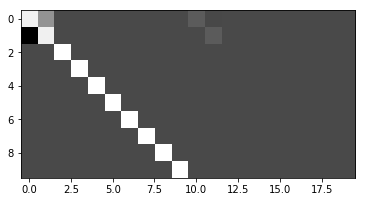

In [23]:
display_weights('model_mle_checkpoint_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_1.pth')

In [10]:
biases

array([-5.26170196e-05, -1.53752271e-05, -4.78623417e-04, -4.82919699e-04,
       -4.27596879e-04, -4.67500355e-04, -4.57764085e-04, -4.72443765e-04,
       -4.83604006e-04, -4.33741968e-04])

In [11]:
weights[:3,:3]

array([[ 3.07703864e-01,  1.35995981e-01,  1.08137166e-04],
       [-1.35222335e-01,  3.05878590e-01,  5.84128878e-06],
       [ 1.05971527e-03, -3.76342874e-04,  3.34494977e-01]])

[[-0.00387795 -0.01594487]
 [-0.00238006 -0.00516345]]
[[ 0.00132322  0.00068781]
 [-0.00206679 -0.00061519]]


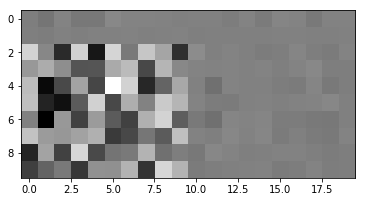

In [34]:
display_weights('act_model_paml_state10_salient2_checkpoint_train_True_lin-dyn-v0_horizon1_traj201_smallModel_1.pth')

Wasn't training, weights look random ...

[[1044.17570715 -822.79511557]
 [-155.20379949  760.92679758]]
[[ 576.9751733    67.87160464]
 [-405.52804029   79.97901619]]


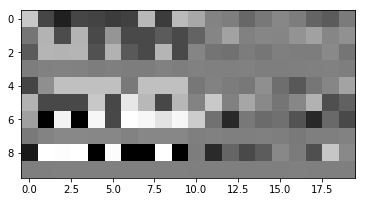

In [32]:
display_weights('model_mle_checkpoint_reinforce_lin_dyn_horizon50_traj51_smallModel_1.pth')

Probably stopped training too early for this one ...

[[-0.0166819   0.20315394]
 [-0.03169831 -0.10066503]]
[[ 0.10860278 -0.05724789]
 [ 0.03399184  0.03849743]]


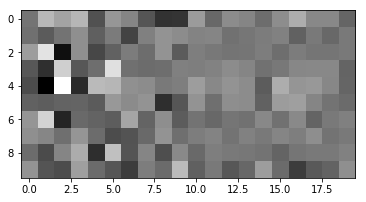

In [31]:
display_weights('model_paml_checkpoint_train_True_lin_dyn_horizon50_traj51_smallModel_1.pth')

[[ 0.30310381  0.13485328]
 [-0.13477149  0.30362083]]
[[ 3.45996250e-02 -4.89363494e-04]
 [ 9.62992819e-05  3.39257682e-02]]


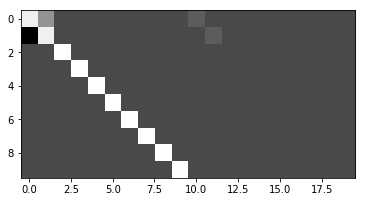

In [30]:
display_weights('model_mle_checkpoint_reinforce_lin_dyn_horizon20_traj21_smallModel_1.pth')

[[0.09303363 0.01623503]
 [0.07580302 0.01064247]]
[[ 0.02412099  0.05464225]
 [ 0.05756873 -0.02648561]]


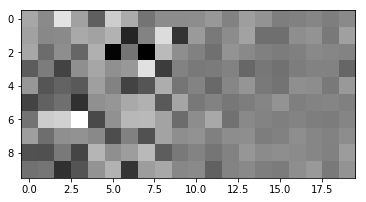

In [29]:
display_weights('model_paml_checkpoint_train_True_lin_dyn_horizon20_traj21_smallModel_1.pth')

[[ 0.24883302 -0.08383143  0.20731201  0.09677503 -0.32662787  0.0442423
  -0.03221949 -0.249192   -0.17948428  0.32180234  0.22345556  0.35929153
   0.36086905  0.09594367 -0.12239925  0.18881965 -0.20614198  0.29977849
   0.34547723  0.31621923]
 [ 0.25656582 -0.14317263 -0.15571732 -0.13975283 -0.34473508  0.36457903
  -0.20218409 -0.00390741 -0.10546653  0.10007485 -0.32819147  0.01275512
   0.31648164 -0.13166017  0.07324666  0.16548284  0.30769277 -0.36991971
  -0.17054723 -0.28739854]
 [-0.27863463 -0.22021384  0.12513069  0.2988914   0.02446148  0.03130826
  -0.04029335 -0.37377187  0.38446216  0.15371712 -0.33298735  0.09367051
   0.26120908  0.23748605  0.34531696  0.33950826  0.31397965 -0.07472512
   0.10529353  0.13303142]
 [-0.32619207  0.12431517 -0.23488893  0.37516133  0.26263626  0.34843003
   0.32797278  0.35047243 -0.38121512 -0.32615637 -0.32596031  0.30882743
  -0.19821501  0.26001539  0.15372059  0.37866057 -0.18902767  0.06995019
  -0.31850657 -0.31117964]
 [-0.

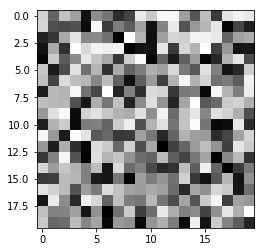

In [11]:
display_weights('model_mle_checkpoint_state10_salient2_actorcritic_lin_dyn_horizon1_traj51_all_losses.pth')

[[ 0.39282714  0.35137471 -0.29771158 -0.06353175 -0.29561518 -0.23278811
  -0.04647411  0.39878908 -0.02182918  0.43778522 -0.43873387 -0.08785349
   0.06468268 -0.20504533  0.01683232 -0.00520635  0.31054077 -0.05728605
  -0.07131708  0.25369876]
 [-0.16664118  0.28792324  0.37503458 -0.25445863  0.06128221 -0.11834906
   0.34401002 -0.05515189 -0.08251063  0.29318349  0.07295536  0.29458579
  -0.17208235 -0.386851    0.07616655  0.3724246   0.33891776 -0.18820606
   0.39416623 -0.27930916]
 [ 0.41639279 -0.02509458 -0.22601257  0.0967279   0.3623254   0.28472357
  -0.22819145  0.11186576  0.17168348 -0.1070392   0.05024702  0.42027532
  -0.11684336  0.34573394 -0.37836791 -0.16581371  0.1041337  -0.1751372
  -0.33591852 -0.07359986]
 [-0.21019201  0.1775444   0.21422461 -0.31551834  0.24556255  0.26572786
   0.28705388 -0.28040284 -0.35117156 -0.01319112  0.15258091  0.20279216
  -0.3456759   0.36644937  0.42925968 -0.03398795  0.07360067  0.07568158
  -0.32738558 -0.4220069 ]
 [ 0.

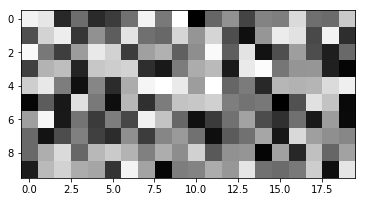

In [9]:
display_weights('model_mle_checkpoint_state10_salient2_actorcritic_lin_dyn_horizon1_traj51_all_losses.pth')

In [19]:
x = 2*(np.random.random(size = (10,)) - 0.5)

In [20]:
mod = np.dot(weights2,np.dot(weights1, np.stack((x, np.zeros(10))).reshape(20)))

In [21]:
A = np.array([[0.9, 0.4], [-0.4, 0.9]])

block = np.eye(8) * 0.98
A_numpy = np.block([
         [A,                      np.zeros((2, 8))],
         [np.zeros((8, 2)), block                                              ]
          ])

In [22]:
tru = np.dot(A_numpy, x)

In [23]:
((mod - tru)**2).mean()

0.8520148799912143

In [24]:
mod

array([ 0.31182127,  0.76499566,  0.15492476,  0.74111107,  0.40811089,
        0.86887166, -0.55346561,  0.88887112, -0.41498698, -0.10770186])

In [25]:
tru

array([ 0.84799836,  0.46305335,  0.43691061, -0.49738073,  0.93980543,
       -0.79708323,  0.46112108,  0.35016884,  0.57345716,  0.97553539])

[[ 0.86095062  0.15175094]
 [-0.30319523  0.73455415]]
[]


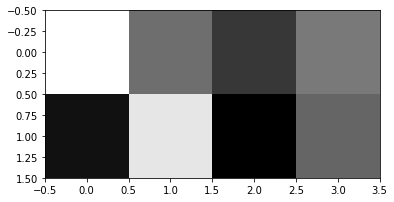

In [49]:
display_weights('model_mle_checkpoint_state2_salient2_actorcritic_lin_dyn_horizon1_traj51_all_losses.pth')

[[-0.00369373 -0.0256253 ]]
[[0.0636567  0.04907829]]


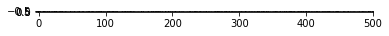

In [28]:
display_weights('act_model_paml_state500_salient3_checkpoint_train_True_Pendulum-v0_horizon8_traj201_hidden_1_constrainedModel_3.pth')

In [5]:
# file_name = 'act_model_paml_state500_salient3_checkpoint_train_True_Pendulum-v0_horizon8_traj201_hidden_1_constrainedModel_3.pth'
file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden_2_rhoER_0_constrainedModel_2.pth'
P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))

NameError: name 'P_hat' is not defined

In [143]:
stablenoise = StableNoise(states_dim, 3, 0.98)

In [144]:
s0 =env.reset()

s0 = torch.from_numpy(stablenoise.get_obs(s0, 0))

In [145]:
a0 = actor.sample_action(s0).detach()
s1_hat = P_hat(torch.cat((s0, a0),0))
s1 = stablenoise.get_obs(env.step(a0.numpy())[0],1)

In [146]:
s1_hat

tensor([-6.0996e-01, -2.9557e-01,  6.1062e-01, -4.2393e-01, -5.3580e-03,
        -2.6337e-01,  1.0905e-01,  9.0331e-01,  2.5690e-02, -6.1709e-01,
        -8.1342e-01, -5.2104e-01,  8.0135e-01, -4.0435e-01, -9.9359e-01,
        -1.9582e-01,  1.2339e-01,  8.9023e-01,  1.7197e-01,  1.0451e-01,
        -8.0683e-01, -3.3421e-01, -1.4628e-01, -5.6822e-02,  2.5905e-01,
         4.0864e-01,  3.6893e-02,  9.1472e-02,  1.8752e-01,  8.4009e-01,
        -1.0395e-01,  8.3815e-01, -9.7000e-01,  3.9375e-01, -4.3344e-01,
        -7.9384e-01,  2.1958e-01,  4.1324e-01, -4.6795e-01, -4.2248e-01,
         3.6637e-01,  5.0727e-01, -8.0056e-01,  5.2388e-02, -1.0016e-01,
         7.7642e-01,  6.4625e-01, -5.3993e-01, -2.9346e-01, -1.4382e-01,
        -9.4011e-01,  5.3002e-02,  8.0714e-01,  8.7428e-01,  1.3921e-01,
         4.1693e-01,  1.5233e-01,  2.5354e-01,  2.1852e-01,  5.4433e-01,
         7.4032e-01,  4.2495e-01, -9.3082e-01, -9.0613e-01,  2.2968e-01,
        -6.0195e-01, -3.2279e-01, -4.8137e-01, -9.1

In [147]:
s1

array([ 0.54609161, -0.83772547, -1.62161579,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98

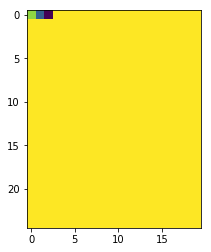

In [148]:
plt.imshow(s1.reshape(25,20))

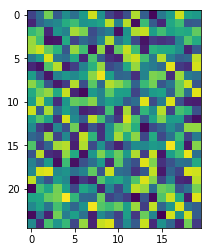

In [149]:
plt.imshow(s1_hat.detach().reshape(25,20))

In [4]:
states_dim = 3
actions_dim = 1#states_dim
max_torque = 2.0
actor = DeterministicPolicy(states_dim, actions_dim, max_torque).double()
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='small', hidden_size=2)
P_hat.double()
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden_2_rhoER_0_constrainedModel_2.pth'
# file_name = 'act_model_paml_state120_salient3_checkpoint_train_True_Pendulum-v0_horizon8_traj201_hidden_2_rhoER_0_constrainedModel_1.pth'
file_name = 'act_model_paml_state3_salient3_checkpoint_train_True_Pendulum-v0_horizon1_traj201_smallModel_real1virt1005.pth'
P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [8]:
stablenoise = StableNoise(states_dim, 3, 0.98)

In [9]:
s0 =env.reset()
s0 = torch.from_numpy(stablenoise.get_obs(s0, 0))

a0 = actor.sample_action(s0).detach()
s1_hat = P_hat(torch.cat((s0, a0),0))
s1 = stablenoise.get_obs(env.step(a0.numpy())[0],1)

In [10]:
plt.imshow(s1.reshape(6,20))

ValueError: cannot reshape array of size 3 into shape (6,20)

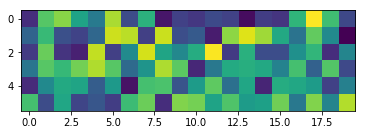

In [370]:
plt.imshow(s1_hat.detach().reshape(6,20))

In [371]:
s1_hat[:3]

tensor([-0.5349,  0.4073,  0.5361], dtype=torch.float64,
       grad_fn=<SliceBackward>)

In [372]:
s1[:3]

array([-0.41013759, -0.91202366, -1.05278714])

IndexError: index 3 is out of bounds for axis 1 with size 3

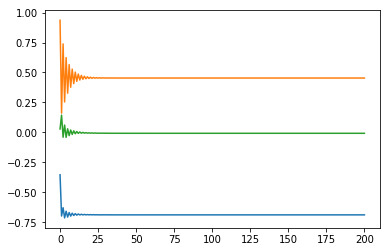

In [14]:
env.seed(1)
state = env.reset()
state = stablenoise.get_obs(state, 0)
states = [state]
actions = []
rewards = []
for timestep in range(200):
    action = actor.sample_action(torch.DoubleTensor(state)).detach()#.numpy()
#     state_prime, reward, done, _ = env.step(action)
#     state_prime = stablenoise.get_obs(state_prime, timestep)
    state_prime = P_hat(torch.cat((torch.DoubleTensor(state), action),0)).detach()
    actions.append(action.numpy())
    states.append(state_prime.numpy())
#     rewards.append(reward.numpy())
    
    state = state_prime
np_states = np.stack(states)
plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
plt.plot(np_states[:,3])
plt.show()

IndexError: index 3 is out of bounds for axis 1 with size 3

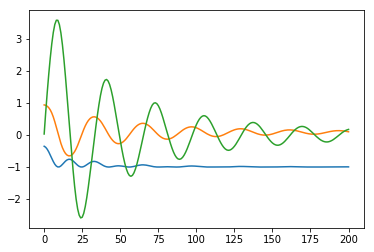

In [12]:
env.seed(1)
state = env.reset()
state = stablenoise.get_obs(state, 0)
states = [state]
actions = []
rewards = []
for timestep in range(200):
    action = actor.sample_action(torch.DoubleTensor(state)).detach().numpy()
    state_prime, reward, done, _ = env.step(action)
    state_prime = stablenoise.get_obs(state_prime, timestep)
    actions.append(action)
    states.append(state_prime)
#     rewards.append(reward.numpy())
    
    state = state_prime
np_states = np.stack(states)
plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
plt.plot(np_states[:,3])
plt.show()

In [ ]:
gym.envs.register(id='lin-dyn-v0', entry_point='gym_linear_dynamics.envs:LinDynEnv',)
env_lin = gym.make('lin-dyn-v0')

In [739]:
states_dim = 120
salient_states_dim = 3
actions_dim = 1
# file_name = 'model_mle_checkpoint_state10_salient2_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_.pth'
file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden3_rho0.1_constrainedModel_1.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_0.pth'
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='constrained', hidden_size=3)
P_hat.double()

actor = DeterministicPolicy(salient_states_dim, actions_dim, max_torque).double()
P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

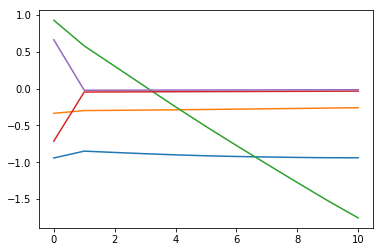

In [888]:
# env_lin.seed(0)
stablenoise = StableNoise(states_dim, salient_states_dim, 0.98)
env.seed(0)
torch.manual_seed(0)
np.random.seed(0)
# state = env_lin.reset()
state = env.reset()
state = stablenoise.get_obs(state, 0)
states = [state]
actions = []
rewards = []
for timestep in range(10):
    action = actor.sample_action(torch.DoubleTensor(state[:3])).detach()#.numpy()
#     state_prime, reward, done, _ = env_lin.step(action.numpy())
#     state_prime, reward, done, _ = env.step(action.numpy())
#     state_prime = stablenoise.get_obs(state_prime, timestep)
    state_prime_delta = P_hat(torch.cat((torch.DoubleTensor(state), action),0)).detach()
    state_prime = state_prime_delta #+ torch.DoubleTensor(state)
    actions.append(action.numpy())
    states.append(state_prime.numpy())
    state = state_prime
    
np_states = np.stack(states)

plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
plt.plot(np_states[:,29])
# plt.plot(np_states[:,4])
# plt.plot(np_states[:,5])
plt.plot(np_states[:,20])
plt.show()

In [561]:
np_states.shape

(2, 120)

In [562]:
((np_states[1:,:3] - np_states[:-1, :3])**2).sum(axis=1).mean()

0.0518653532477517

In [563]:
((np_states[1:,3:] - np_states[:-1,3:])**2).sum(axis=1).mean()

38.066685811285666

In [564]:
((np_states[1:,:] - np_states[:-1,:])**2).sum(axis=1).mean()

38.118551164533415

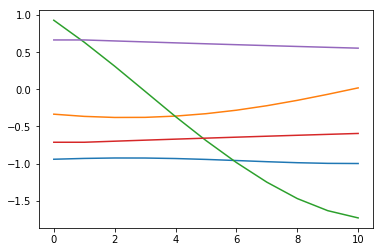

In [889]:
env.seed(0)
torch.manual_seed(0)
np.random.seed(0)

state = env.reset()
state = stablenoise.get_obs(state, 0)
states = [state]
actions = []
rewards = []
for timestep in range(10):
    action = actor.sample_action(torch.DoubleTensor(state[:3])).detach()#.numpy()
    state_prime, reward, done, _ = env.step(action.numpy())
    state_prime = stablenoise.get_obs(state_prime, timestep)
#     state_prime = P_hat(torch.cat((torch.DoubleTensor(state), action),0)).detach()
    actions.append(action)#.numpy())
    states.append(state_prime)#.numpy())
    state = state_prime
    
np_states = np.stack(states)

plt.plot(np_states[:,0])
plt.plot(np_states[:,1])
plt.plot(np_states[:,2])
plt.plot(np_states[:,29])
# plt.plot(np_states[:,4])
# plt.plot(np_states[:,5])
plt.plot(np_states[:,20])
plt.show()

[[-0.77562084 -1.23568495]
 [-0.93095469  0.28051384]]
[[-0.01528178 -0.00473196]
 [-0.02846617  0.00987333]]


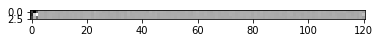

In [566]:
display_weights(file_name)

[[-0.15172562 -0.50958128]
 [-0.71207482 -0.04719418]]
[]


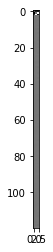

In [567]:
display_weights2(file_name)

In [742]:
states_dim = 120
salient_states_dim = 3
actions_dim = 1
# file_name = 'model_mle_checkpoint_state10_salient2_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden3_rho0.1_splitextradims_constrainedModel_1.pth'
file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden10_rho0.25_constrainedModel_0.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_0.pth'
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='constrained', hidden_size=10)
P_hat.double()

actor = DeterministicPolicy(salient_states_dim, actions_dim, max_torque).double()
P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

[[-0.05611675 -0.90925017]
 [ 0.58053961  0.10929343]]
[[ 0.00733498 -0.08246666]
 [-0.03410641 -0.0968743 ]]


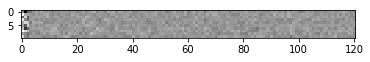

In [724]:
display_weights(file_name)

[[-0.02606078  0.49956153]
 [-0.32505705  0.05101816]]
[]


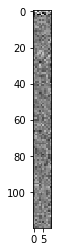

In [725]:
display_weights2(file_name)

In [712]:
states_dim = 120
salient_states_dim = 3
actions_dim = 1
# file_name = 'model_mle_checkpoint_state10_salient2_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden3_rho0.1_splitextradims_constrainedModel_1.pth'
file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_rho0.25_smallModel_0.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_0.pth'
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='small', hidden_size=10)
P_hat.double()

actor = DeterministicPolicy(salient_states_dim, actions_dim, max_torque).double()
P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

[[ 0.98284641  0.00434727]
 [-0.00258537  0.94820436]]
[[ 1.48624694e-02 -3.36291682e-05]
 [ 1.89432149e-02 -9.30951514e-03]]


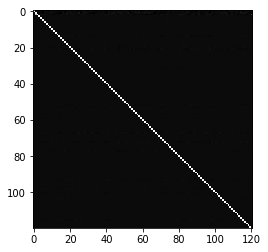

In [713]:
display_weights(file_name)

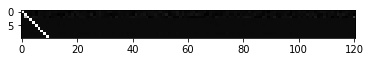

In [714]:
weights = P_hat.fc1.weight.data.numpy()
weights = weights[:10,:]
maxVal = weights.max()
minVal = np.abs(weights.min())
maxVal = np.maximum(maxVal,minVal)
weights = weights / maxVal
weights = weights / 2.
weights = weights + 0.5
plt.imshow(weights, cmap="gray")
plt.show()

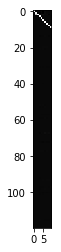

In [715]:
weights = P_hat.fc1.weight.data.numpy()
weights = weights[:,:10]
maxVal = weights.max()
minVal = np.abs(weights.min())
maxVal = np.maximum(maxVal,minVal)
weights = weights / maxVal
weights = weights / 2.
weights = weights + 0.5
plt.imshow(weights, cmap="gray")
plt.show()

In [716]:
weights = P_hat.fc1.weight.data.numpy()
weights[:3,:3]

array([[ 9.82846408e-01,  4.34726931e-03, -3.23577806e-04],
       [-2.58536581e-03,  9.48204358e-01, -1.56186561e-02],
       [-2.07067178e-03,  7.07247767e-01,  9.88935803e-01]])

In [741]:
weights_constrained_hid3= P_hat.fc1.weight.data.numpy()
weights_constrained_hid3[:3,:3]

array([[-0.77562084, -1.23568495, -0.53424726],
       [-0.93095469,  0.28051384,  0.61273112],
       [-0.72207577,  0.08956995, -0.43778666]])

In [743]:

weights_constrained_hid10= P_hat.fc1.weight.data.numpy()
weights_constrained_hid10[:3,:3]

array([[-0.05583912, -0.9093342 , -0.29861043],
       [ 0.5801058 ,  0.11102166,  0.09309538],
       [-0.31458277,  0.37377287, -0.36109824]])

In [751]:
((weights_constrained_hid3[:3,:3] - weights_constrained_hid10[:3,:3])**2).sum()

3.514870911145208

In [750]:
((weights[:3,:3] - weights_constrained_hid3[:3,:3])**2).sum()

9.552935355526548

In [749]:
((weights[:3,:3] - weights_constrained_hid10[:3,:3])**2).sum()

5.086340340334063

In [773]:
((weights_30_constrained_hid10[:3,:3] - weights_constrained_hid10[:3,:3])**2).sum()

3.475456419549211

In [780]:
weights_30_constrained_hid10 =  P_hat.fc1.weight.data.numpy()
weights_30_constrained_hid10[:3,:3]

array([[-0.16124684, -0.04711858,  0.2268714 ],
       [-0.32976724, -0.3959731 , -0.27822212],
       [ 0.0561645 ,  0.21783989,  0.66804566]])

In [886]:
weights_30_constrained_hid3 =  P_hat.fc1.weight.data.numpy()
weights_30_constrained_hid3[:3,:3]

array([[-0.76009994, -0.41161858, -0.54201825],
       [-1.03904491,  0.19791853,  0.57567527],
       [-0.67552996, -0.51878141, -0.45050158]])

In [887]:
((weights[:3,:3] - weights_30_constrained_hid3[:3,:3])**2).sum()

9.519803310154487

In [883]:
states_dim = 120
salient_states_dim = 3
actions_dim = 1
# file_name = 'model_mle_checkpoint_state10_salient2_actorcritic_lin-dyn-v0_horizon1_traj201_smallModel_.pth'
# file_name = 'model_mle_checkpoint_state30_salient3_actorcritic_Pendulum-v0_horizon1_traj201_hidden3_rho0.25_constrainedModel_0.pth'
file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_rho0.25_constrainedModel_1.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_rho0.25_smallModel_0.pth'
# file_name = 'model_mle_checkpoint_state120_salient3_actorcritic_Pendulum-v0_horizon1_traj201_0.pth'
P_hat = DirectEnvModel(states_dim, actions_dim, max_torque, model_size='constrained', hidden_size=3)
P_hat.double()

actor = DeterministicPolicy(salient_states_dim, actions_dim, max_torque).double()
P_hat.load_state_dict(torch.load(os.path.join(file_location,file_name), map_location=device))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

[[-0.76009994 -0.41161858]
 [-1.03904491  0.19791853]]
[[-0.11053389  0.09618301]
 [-0.06435141 -0.0245611 ]]


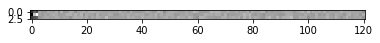

In [884]:
display_weights(file_name)

[[-0.34739437 -0.51203314]
 [ 0.18258787 -0.06200436]]
[]


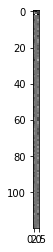

In [885]:
display_weights2(file_name)

In [860]:
weights[0,120]

-0.003981169856954178

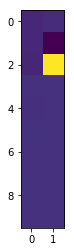

In [880]:
plt.imshow(weights[0:10,119:])

In [882]:
weights[0:4,119:]

array([[-7.56790877e-03, -3.98116986e-03],
       [-7.85475766e-03, -3.45114528e-02],
       [-8.31117491e-03,  2.07324221e-01],
       [-9.14056079e-05, -1.44670003e-05]])